In [6]:
!pip install --user pipwin

In [7]:
!pip install PyAudio

In [8]:
!pip install SpeechRecognition

In [9]:
!pip install textblob

In [10]:
import speech_recognition as sr

In [11]:
def recognize_speech_from_mic(recognizer, microphone):

    # check that recognizer and microphone arguments are appropriate type
    if not isinstance(recognizer, sr.Recognizer):
        raise TypeError("`recognizer` must be `Recognizer` instance")

    if not isinstance(microphone, sr.Microphone):
        raise TypeError("`microphone` must be `Microphone` instance")

    # adjust the recognizer sensitivity to ambient noise and record audio
    # from the microphone
    with microphone as source:
        recognizer.adjust_for_ambient_noise(source) # #  analyze the audio source for 1 second
        audio = recognizer.listen(source)

    # set up the response object
    response = {
        "success": True,
        "error": None,
        "transcription": None
    }

    # try recognizing the speech in the recording
    # if a RequestError or UnknownValueError exception is caught,
    #   update the response object accordingly
    try:
        response["transcription"] = recognizer.recognize_google(audio)
    except sr.RequestError:
        # API was unreachable or unresponsive
        response["success"] = False
        response["error"] = "API unavailable/unresponsive"
    except sr.UnknownValueError:
        # speech was unintelligible
        response["error"] = "Unable to recognize speech"

    return response

In [12]:
recognizer = sr.Recognizer()

In [13]:
mic = sr.Microphone(device_index=1)

In [14]:
response = recognize_speech_from_mic(recognizer, mic)

In [15]:
print('\nSuccess : {}\nError   : {}\n\nText from Speech\n{}\n\n{}' \
          .format(response['success'],
                  response['error'],
                  '-'*17,
                  response['transcription']))


Success : True
Error   : Unable to recognize speech

Text from Speech
-----------------

None


In [32]:
temp_str = ''
records_all = []
while (temp_str != 'bye' and temp_str!=None):
    print('Speak it out')
    response = recognize_speech_from_mic(recognizer, mic)
    if response['success']:
        temp_str = response['transcription']
        print('You said :' ,temp_str )
        if (temp_str != 'bye'):
            records_all.append(temp_str)
print('Thanks for your suggetions')
print('Your suggetions on given Movies')
print(records_all)

Speak it out
You said : hello
Speak it out
You said : I hated it
Speak it out
You said : I don't know much about it
Speak it out
You said : None
Thanks for your suggetions
Your suggetions on given Movies
['hello', 'I hated it', "I don't know much about it", None]


In [33]:
records_all.remove(None)
records_all

['hello', 'I hated it', "I don't know much about it"]

In [34]:
from textblob import TextBlob

In [35]:
def get_sentiment(sentx):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed text
        analysis = TextBlob(sentx)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return ('positive')
        elif analysis.sentiment.polarity == 0:
            return ('neutral')
        else:
            return ('negative')

In [36]:
# Select from collection
sentimets_total = {'neutral': 0 , 'positive' : 0 , 'negative':0}
for recd_sent in records_all:
    sentiment = get_sentiment(recd_sent)
    print (sentiment,'===>',recd_sent)
    sentimets_total[sentiment] = sentimets_total[sentiment] + 1
    print('###########################################')
print(sentimets_total)

neutral ===> hello
###########################################
negative ===> I hated it
###########################################
positive ===> I don't know much about it
###########################################
{'neutral': 1, 'positive': 1, 'negative': 1}


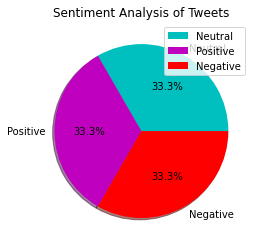

In [37]:
from matplotlib import pyplot as plt
slices = [sentimets_total['neutral'],sentimets_total['positive'],sentimets_total['negative']]
activities = ['Neutral','Positive','Negative']
cols = ['c','m','r',]

plt.pie(slices,
        labels=activities,
        colors=cols,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Sentiment Analysis of Tweets')
plt.legend()
plt.show()